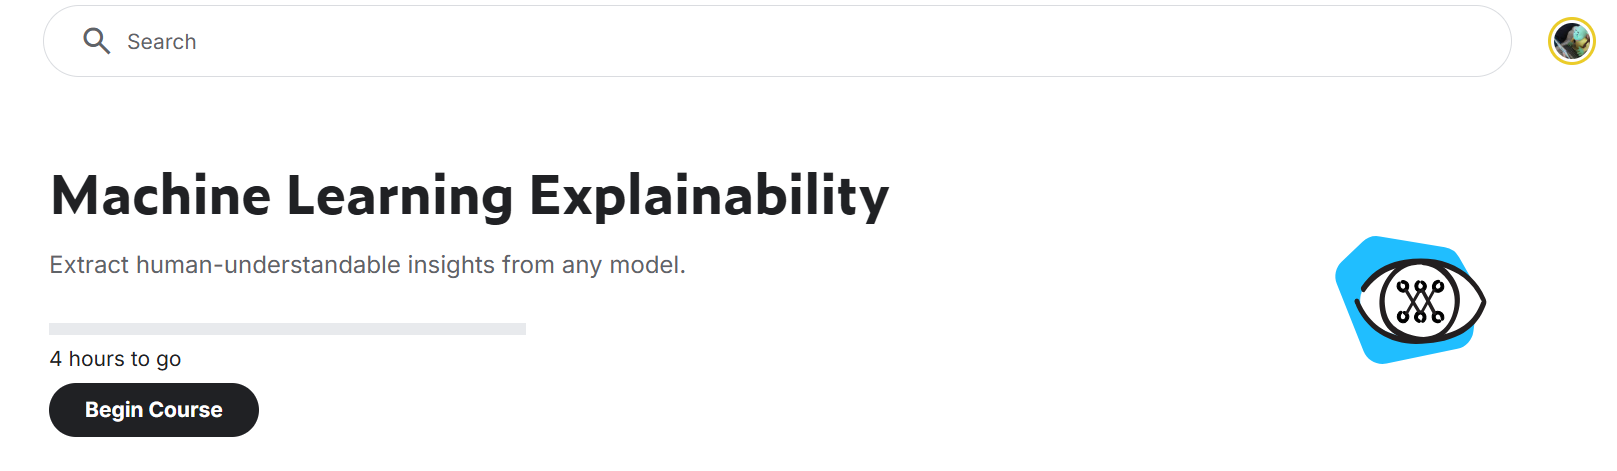

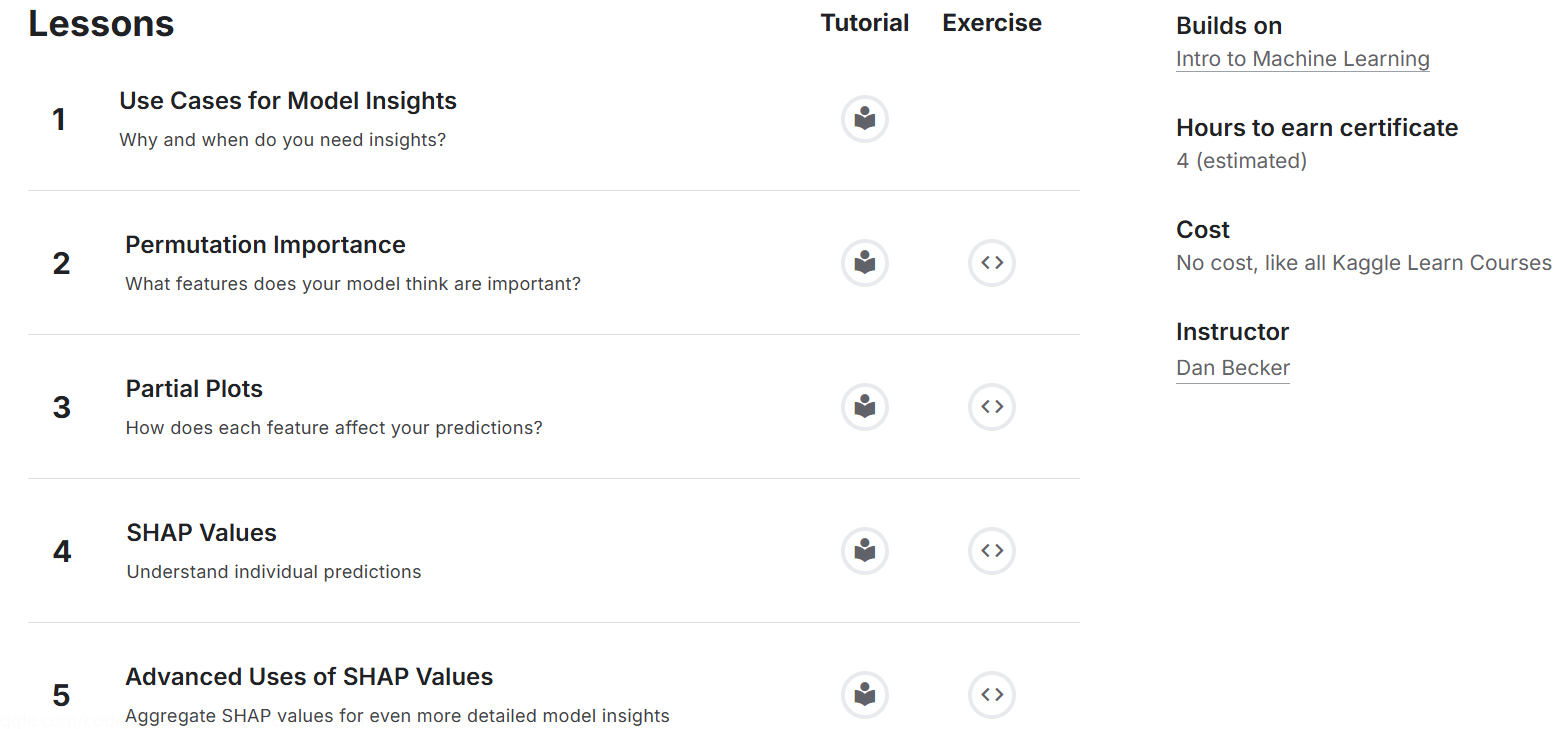

# <span style='color: #0096FF'>1. Use Cases for Model Insights

- What features in the data did the model think are most important?
- For any single prediction from a model, how did each feature in the data affect that particular prediction?
- How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?

**Feature engineering** is usually the most effective way to improve model accuracy. Feature engineering usually involves repeatedly creating new features using transformations of your raw data or features you have previously created.

---

A Kaggle competition to **[predict loan defaults](https://www.kaggle.com/c/loan-default-prediction)** gives an extreme example. This competition had 100s of raw features. For privacy reasons, the features had names like f1, f2, f3 rather than common English names. This simulated a scenario where you have little intuition about the raw data.

One competitor found that the difference between two of the features, specificallyf527 - f528, created a very powerful new feature. Models including that difference as a feature were far better than models without it. But how might you think of creating this variable when you start with hundreds of variables?

As an increasing number of datasets start with 100s or 1000s of raw features, this approach is becoming increasingly important.

# <span style='color: #0096FF'>2. Permutation Importance

What features have the biggest impact on predictions? This concept is called **feature importance**.

**Permutation importance is calculated after a model has been fitted**. So we won't change the model or change what predictions.

---

We will ask the following question: If I randomly shuffle a single column of the validation data, leaving the target and all other columns in place, how would that affect the accuracy of predictions in that now-shuffled data?
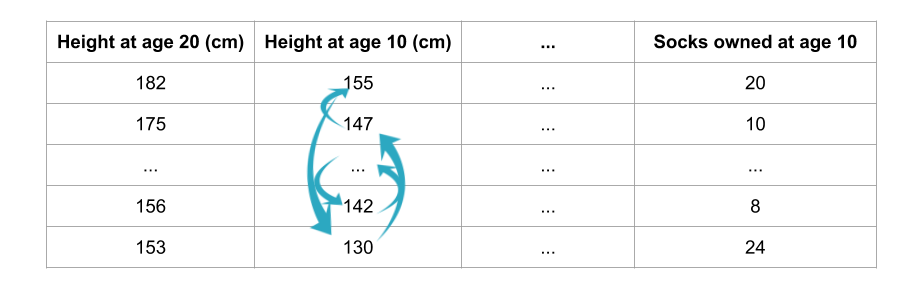

Randomly re-ordering a single column should cause less accurate predictions, since the resulting data no longer corresponds to anything observed in the real world. Model accuracy especially suffers if we shuffle a column that the model relied on heavily for predictions. In this case, shuffling *height at age 10* would cause terrible predictions. If we shuffled *socks owned* instead, the resulting predictions wouldn't suffer nearly as much.

With this insight, the process is as follows:

1. Get a trained model.
2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.

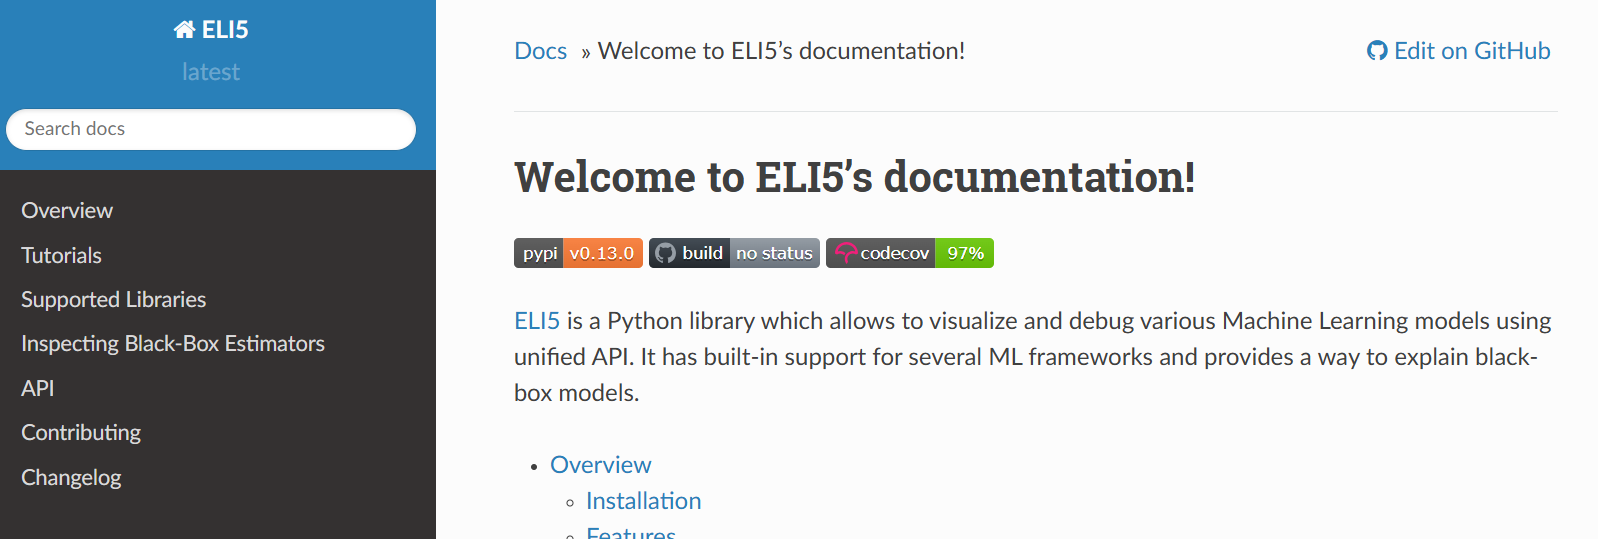

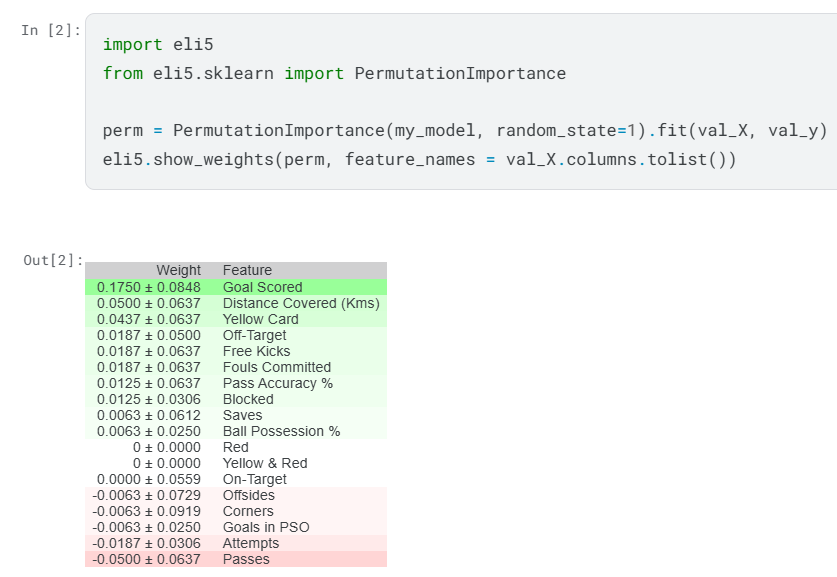

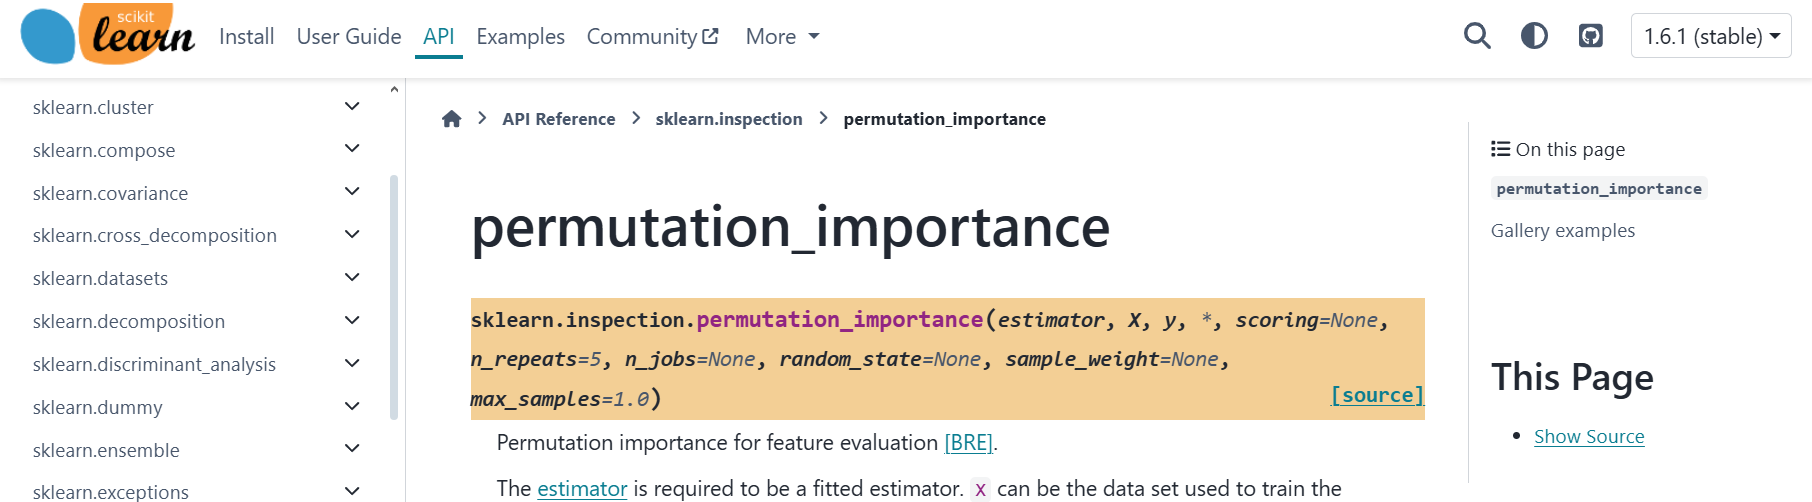

### Interpreting Permutation Importances¶
The values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets, like the one in this example, because there is more room for luck/chance.

In our example, the most important feature was Goals scored. That seems sensible. Soccer fans may have some intuition about whether the orderings of other variables are surprising or not.

### The scale of features does not affect permutation importance with tree based models, like the Random Forest

# <span style='color: #0096FF'>3. Partial Plots

While feature importance shows what variables most affect predictions, partial dependence plots show **how** a feature affects predictions.

### At first glance

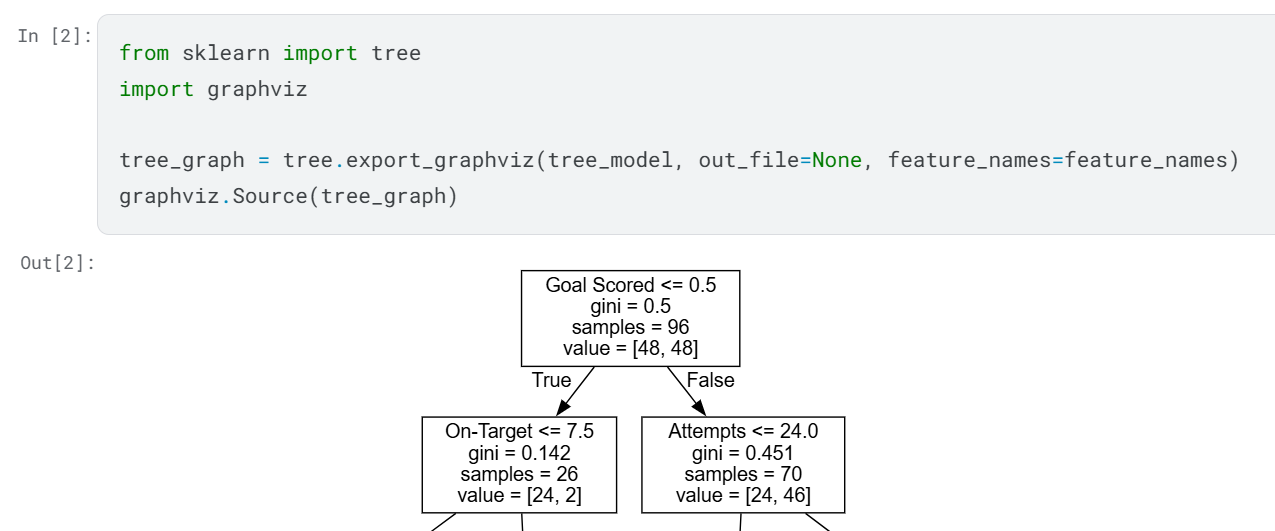

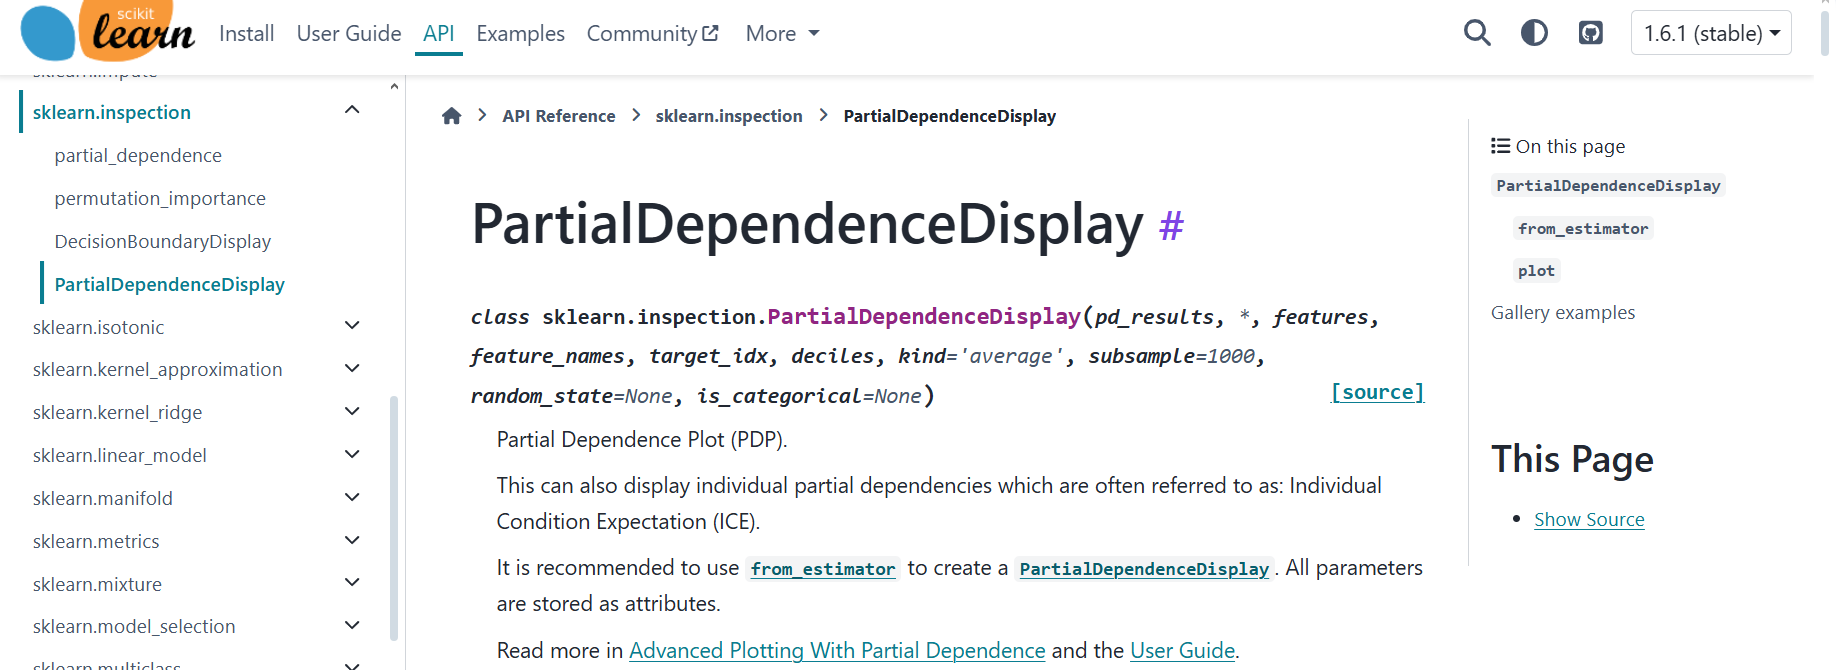

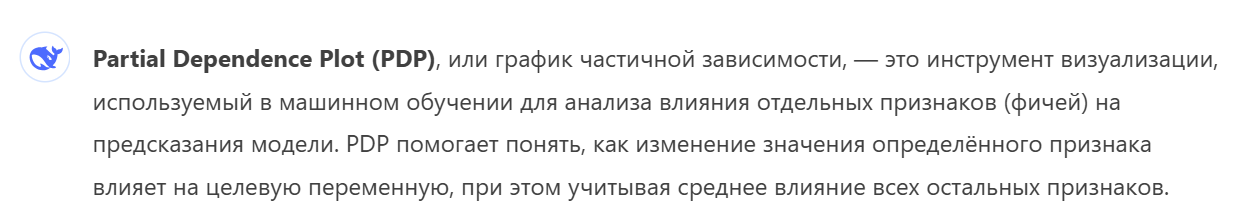

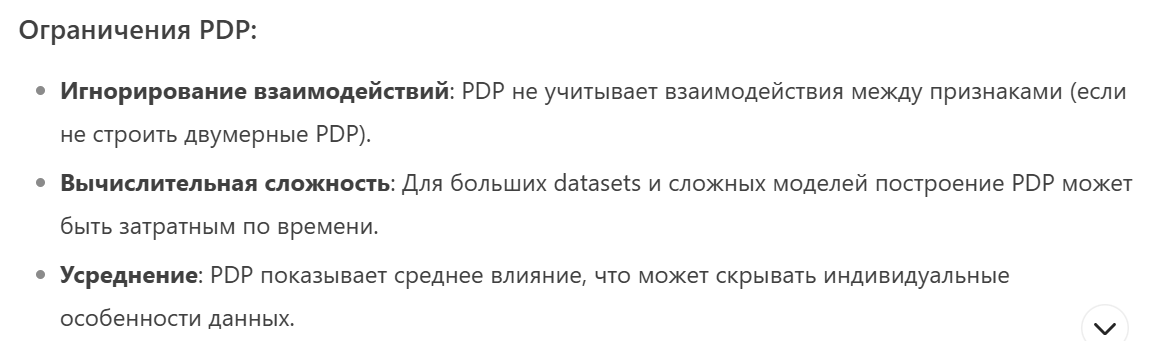

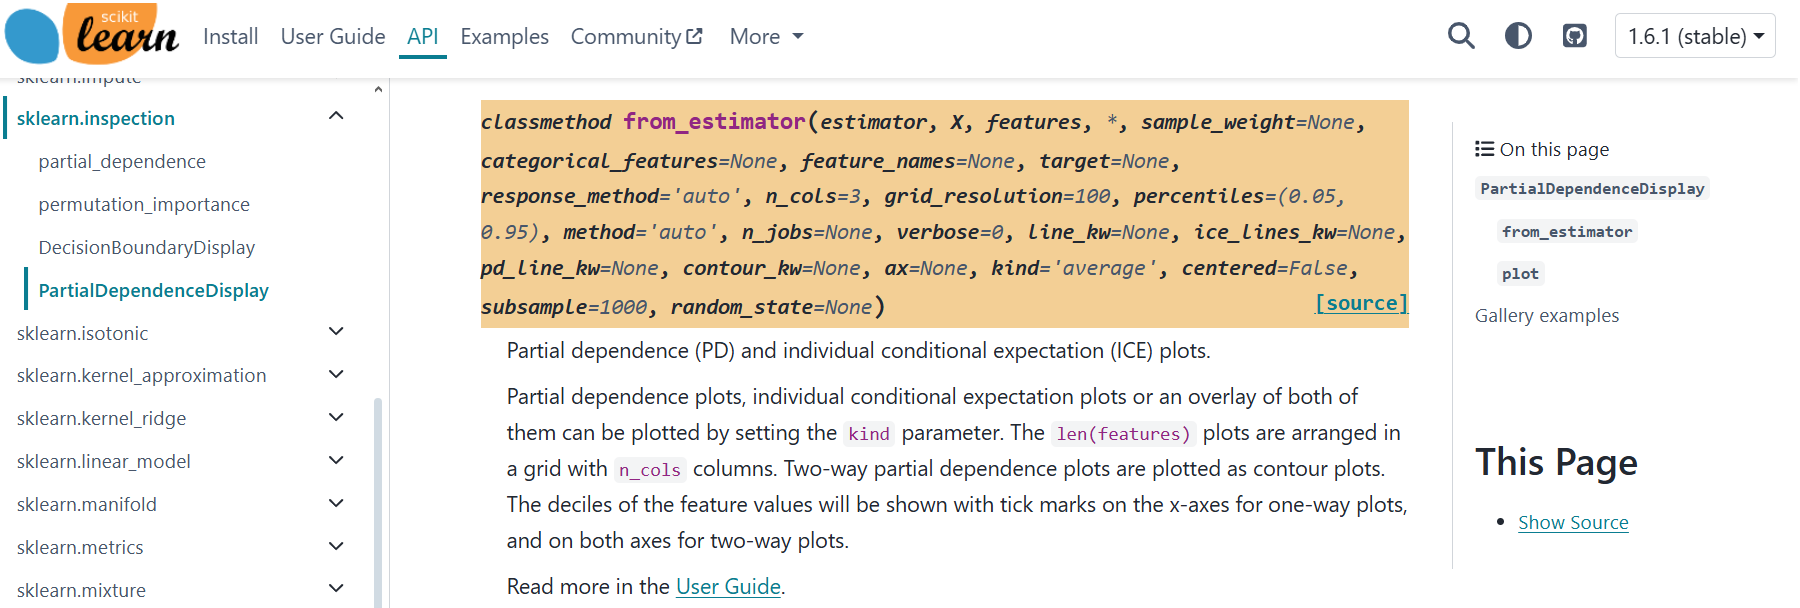

### Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest